# Multiple linear regression in Python

In [124]:
#Importing the libraries
import pandas as pd
import numpy as np

In [125]:
# Installing seaborn (this step may not be necessary if seaborn is already installed)
import piplite
await piplite.install("seaborn")

# Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying plots inline in Jupyter/Colab notebooks
%matplotlib inline

**Linear Regression**:

Linear regression is a statistical method used to analyze the relationship between a dependent variable and one or more independent variables. In linear regression, the relationship between the variables is modeled using a linear equation. This equation can be used to predict the value of the dependent variable based on the values of the independent variables.

There are several types of linear regression, including simple linear regression, multiple linear regression, and polynomial regression.

 - **Simple linear regression**: This type of linear regression models the relationship between a dependent variable and a single independent variable. It is used to identify the strength of the relationship between the two variables and to predict the value of the dependent variable based on the value of the independent variable.

  - **Multiple linear regression**: This type of linear regression models the relationship between a dependent variable and two or more independent variables. It is used to identify the strength of the relationship between the variables and to predict the value of the dependent variable based on the values of the independent variables.

 - **Polynomial regression**: This type of linear regression is used to model relationships between the dependent and independent variables that are not linear. It can be used to fit a curve to the data and make predictions based on the curve.

You can find my project about simple linear regression [here](https://github.com/alinamuskhan/SimpleLinearRegression-Analysis).

Multiple regression is a statistical method used to model the relationship between multiple independent variables and a dependent variable. In Python, this can be performed using the sklearn library. To use multiple regression with this library, you will first need to create a LinearRegression object, then train the model on your data using the fit() method. Once the model is trained, you can use the predict() method to make predictions on new data.

    Here : Y = b0 + b1 x1 + b2 x2 + b3 x3 + …… bn xn
    
    Y = Dependent variable and x1, x2, x3, …… xn = multiple independent variables

**Assumption of Regression Model :**

- Linearity : The relationship between dependent and independent variables should be linear.
    
- Homoscedasticity : Constant variance of the errors should be maintained.
    
- Multivariate normality : Multiple Regression assumes that the residuals are normally distributed.
    
- Lack of Multicollinearity : It is assumed that there is little or no multicollinearity in the data.
    

# importing warnings
import warnings
warnings.filterwarnings("ignore")

In [126]:
# Reading the Dataset
df=pd.read_csv("data.csv")

In [127]:
# The following command displays the first 10 rows of the DataFrame 'df'
# It is useful to quickly inspect the data and check its structure, columns, and values.

df.head(10) # Showing the first 10 rows of the DataFrame 'df'

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [128]:
# The following command returns the number of rows and columns in the DataFrame 'df'.
# It is useful to quickly check the size of your dataset.

df.shape  # Returns a tuple (number_of_rows, number_of_columns)

(36, 5)

In [129]:
# The following command generates descriptive statistics for all the numerical columns in the DataFrame 'df'
# It helps you quickly summarize the distribution and central tendency of the data.

df.describe()  # Returns summary statistics for numerical columns in the DataFrame

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [130]:
# The following command provides a summary of the DataFrame 'df'.
# It includes the column names, data types, and the number of non-null entries for each column.

df.info()  # Returns a summary of the DataFrame, including column data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [131]:
# The following command displays the first 5 rows of the DataFrame 'df'
# This is useful to get a quick preview of your data and check its structure.

df.head()  # Returns the first 5 rows of the DataFrame by default

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [132]:
# The following command displays the last 5 rows of the DataFrame 'df'
# It is useful for checking the end of your dataset and making sure the data is properly loaded.

df.tail()  # Returns the last 5 rows of the DataFrame by default

,Car,Model,Volume,Weight,CO2
31,Volvo,XC70,2000,1746,117
32,Ford,B-Max,1600,1235,104
33,BMW,216,1600,1390,108
34,Opel,Zafira,1600,1405,109
35,Mercedes,SLK,2500,1395,120


 **Then make a list of the independent values and call this variable X. Put the dependent values in a variable called y.**

It is common to name the list of independent values with an uppercase X and the list of dependent values with a lowercase y.

- Equation: Sales = β0 + (β1 Weight) + (β2 Volume) + e
    
- Setting the values for independent (X) variable and dependent (Y) variable





In [133]:
# The following command splits the DataFrame 'df' into feature variables (X) and target variable (y)

# 'X' contains the features we want to use to predict 'y'
X = df[['Weight', 'Volume']]  # Features: Weight and Volume

# 'y' is the target variable we want to predict, in this case, CO2 emissions
y = df['CO2']  # Target: CO2 emissions

###### Checking for outliers

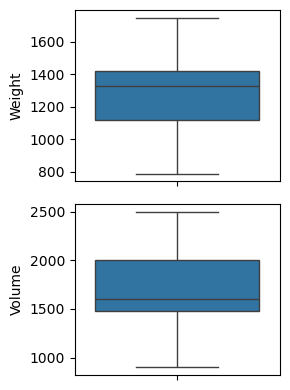

In [134]:
#Creating a figure with two subplots (2 rows, 1 column) and specifying the figure size
fig, axs = plt.subplots(2, figsize = (3,4)) # (2 rows, 1 column), adjusting size to 6x8 inches

#Creating a boxplot for the 'Weight' column in the first subplot (axs[0])
plt1 = sns.boxplot(df['Weight'], ax = axs[0])

# Creating a boxplot for the 'Volume' column in the second subplot (axs[1])
plt2 = sns.boxplot(df['Volume'], ax = axs[1])


# Adjusting the layout of the plots so that they don't overlap
plt.tight_layout() # Ensures the subplots have proper spacing

# Display the plots
plt.show()  # This will render the plots

**Exploratory Data Analysis**

**Distribution of the target variable**


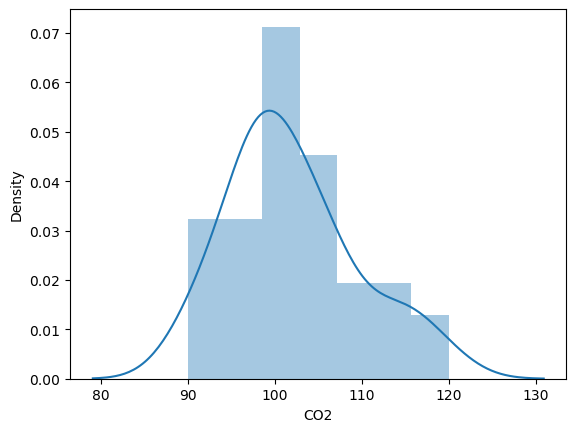

In [135]:
sns.distplot(df['CO2']);

**Conclusion:** It is normally distributed


**Relationship of CO2 with other variables**


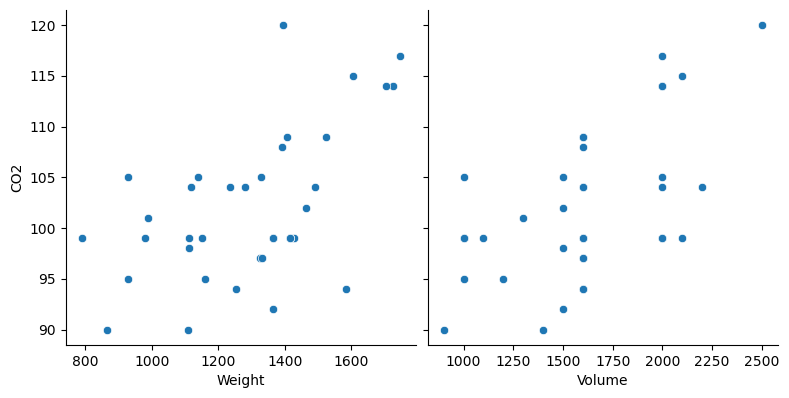

In [136]:
# Creating pairwise scatter plots for 'Weight' and 'Volume' against 'CO2'
sns.pairplot(df,
             x_vars=['Weight', 'Volume'],# Features (x-axis variables)
             y_vars='CO2',                 # Target (y-axis variable)
             height=4,                     # Size of each plot
             aspect=1,                     # Aspect ratio (1 means square)
             kind='scatter')               # Type of plot: scatterplot
 
# Display the plot
plt.show();

**Heatmap**  

The sns.heatmap() function creates a visualization that shows the correlation matrix of a dataset as a heatmap. The annot parameter of this function shows or does not show correlation values in the cells of the heatmap. If this parameter is set to True, correlation values in cells are displayed.

In [137]:
# Listing the columns for which I want to calculate the correlation matrix
my_data=['Weight', 'Volume']

In [138]:
# Creating the correlation matrix for the selected columns
df[my_data].corr() # Computing the correlation matrix

,Weight,Volume
Weight,1.000000,0.753537
Volume,0.753537,1.000000


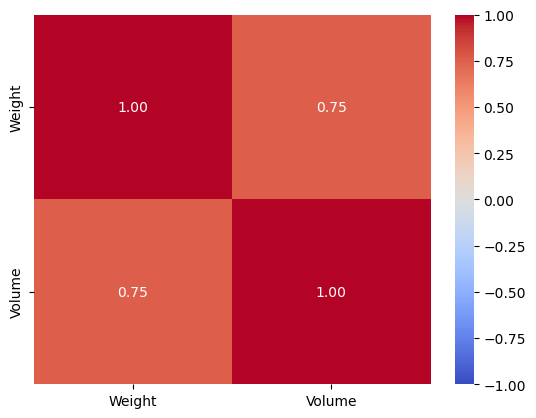

In [139]:
# Creating the correlation matrix and representing it as a heatmap.
sns.heatmap(df[my_data].corr() , # Data for heatmap
            annot=True,           # Annotating each cell with the numeric value
            vmin=-1, vmax=1,      # Setting the value range of the color scale
            fmt=".2f",            # Formating numbers to 2 decimal places
            cmap='coolwarm')      # Using the 'coolwarm' color map
        
# Displaying the plot
plt.show()  # Render and displaying the heatmap

**Model Building**

**Splitting the dataset into train and test set**



We need to split our dataset into training and testing sets. We’ll perform this by importing train_test_split from sklearn.model_selection library. It is usually good to keep 70% of the data in your train dataset and the rest 30% in your test dataset.


In [140]:
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [141]:
y_train.shape

(25,)

In [142]:
y_test.shape

(11,)

In [143]:
X_train.shape

(25, 2)

In [144]:
X_test.shape

(11, 2)

In [145]:
# Import the LinearRegression class from sklearn
from sklearn.linear_model import LinearRegression
# Create an instance of the LinearRegression model
regr= LinearRegression()

In [146]:
# Fit the model to the training data
regr.fit(X,y)

LinearRegression()

In [147]:
#Printing the model coefficients
print("Intercept:",regr.intercept_)

Intercept: 79.69471929115937


In [148]:
# pair the feature names with the coefficients
list(zip(X, regr.coef_))

[('Weight', 0.007550947270300691), ('Volume', 0.007805257527747125)]

In [149]:
# Making a prediction for new data manually 
predictedCO2 = regr.predict([[1000, 3000]])

# Output the predicted CO2 emissions
print(predictedCO2)

[110.66143914]


In [150]:
#Predicting the Test and Train set result 
y_pred= regr.predict(X_test)  
x_pred= regr.predict(X_train) 

print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 93.46522516 105.33289232 101.50855121 109.74143455 101.70964861
  95.89663018 108.17959944 102.67894804  94.51480683  97.82012716
 100.63264133]


In [151]:
#Actual value and the predicted value

#Create a DataFrame with the features and predicted values
regr_model= pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})

# Output the sorted DataFrame
print(regr_model)

    Actual value  Predicted value
0             99        93.465225
19           105       105.332892
32           104       101.508551
35           120       109.741435
7             92       101.709649
12            99        95.896630
29           114       108.179599
33           108       102.678948
5            105        94.514807
1             95        97.820127
18           104       100.632641


In [152]:
# Sorting by predicted value and showing the top 5
regr_model.sort_values(by='Predicted value', ascending=False).head()

,Actual value,Predicted value
35,120,109.741435
29,114,108.179599
19,105,105.332892
33,108,102.678948
7,92,101.709649


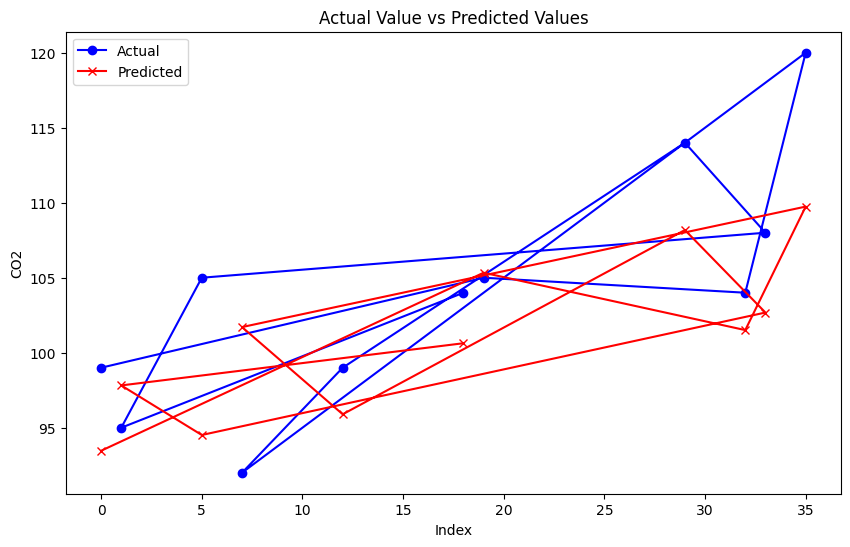

In [153]:
#Plotting Actual Values vs Predicted Values
plt.figure(figsize=(10, 6))  # Setting the size of the plot

# Plotting actual values
plt.plot(regr_model['Actual value'], label='Actual', color='blue', marker='o')

# Plotting predicted values
plt.plot(regr_model['Predicted value'], label='Predicted', color='red', marker='x')

# Adding titles and labels
plt.title('Actual Value vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('CO2')  # Adjustting 'CO2' to my target variable name
plt.legend()

# Display the plot
plt.show()